In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns

In [2]:
data_path = os.getcwd()+"/datasets"
atlantic_path = data_path + "/atlantic.csv"
pacific_path = data_path + "/pacific.csv"

atlantic = pd.read_csv(atlantic_path)
pacific = pd.read_csv(pacific_path)

In [3]:
atlantic.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
atlantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49105 entries, 0 to 49104
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                49105 non-null  object
 1   Name              49105 non-null  object
 2   Date              49105 non-null  int64 
 3   Time              49105 non-null  int64 
 4   Event             49105 non-null  object
 5   Status            49105 non-null  object
 6   Latitude          49105 non-null  object
 7   Longitude         49105 non-null  object
 8   Maximum Wind      49105 non-null  int64 
 9   Minimum Pressure  49105 non-null  int64 
 10  Low Wind NE       49105 non-null  int64 
 11  Low Wind SE       49105 non-null  int64 
 12  Low Wind SW       49105 non-null  int64 
 13  Low Wind NW       49105 non-null  int64 
 14  Moderate Wind NE  49105 non-null  int64 
 15  Moderate Wind SE  49105 non-null  int64 
 16  Moderate Wind SW  49105 non-null  int64 
 17  Moderate Win

In [5]:
pacific.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

### Data Preprocessing

Converting Longitude and Latitude to floats from strings

In [6]:
# Function to move the last character to the beginning
def move_last_char_to_beginning(s):
    if len(s) > 1:  
        return s[-1] + s[:-1]
    return s 

# Apply the function to the column (for example, 'Latitude')
atlantic['Latitude'] = atlantic['Latitude'].apply(move_last_char_to_beginning)
atlantic['Longitude'] = atlantic['Longitude'].apply(move_last_char_to_beginning)
pacific['Latitude'] = pacific['Latitude'].apply(move_last_char_to_beginning)
pacific['Longitude'] = pacific['Longitude'].apply(move_last_char_to_beginning)

atlantic['Latitude'] = atlantic['Latitude'].str.replace('N', '').str.replace('S', '-').astype(float)
atlantic['Longitude'] = atlantic['Longitude'].str.replace('E', '').str.replace('W', '-').astype(float)

pacific['Latitude'] = pacific['Latitude'].str.replace('N', '').str.replace('S', '-').astype(float)
pacific['Longitude'] = pacific['Longitude'].str.replace('E', '').str.replace('W', '-').astype(float)

In [13]:
print(atlantic[['Maximum Wind', 'Minimum Pressure']].describe())
print(pacific[['Maximum Wind', 'Minimum Pressure']].describe())


       Maximum Wind  Minimum Pressure
count  49105.000000      49105.000000
mean      52.005091       -251.406496
std       27.681902        964.313907
min      -99.000000       -999.000000
25%       35.000000       -999.000000
50%       45.000000       -999.000000
75%       70.000000        990.000000
max      165.000000       1024.000000
       Maximum Wind  Minimum Pressure
count  26137.000000      26137.000000
mean      48.949344         18.176225
std       25.334450        996.896388
min       10.000000       -999.000000
25%       30.000000       -999.000000
50%       45.000000        941.000000
75%       65.000000       1002.000000
max      185.000000       1021.000000


Count Hurricane Events by Year

In [14]:
atlantic['Year'] = atlantic['Date'].astype(str).str[:4].astype(int)
pacific['Year'] = pacific['Date'].astype(str).str[:4].astype(int)

atlantic_counts_by_year = atlantic.groupby('Year').size()
pacific_counts_by_year = pacific.groupby('Year').size()

print(atlantic_counts_by_year)
print(pacific_counts_by_year)


Year
1851     98
1852    134
1853    100
1854     60
1855     35
       ... 
2011    557
2012    654
2013    346
2014    300
2015    339
Length: 165, dtype: int64
Year
1949     82
1950    117
1951    131
1952     95
1953     52
       ... 
2011    411
2012    500
2013    568
2014    840
2015    717
Length: 67, dtype: int64


Analyze the Strongest Hurricanes

In [15]:
strongest_atlantic = atlantic.nlargest(10, 'Maximum Wind')
strongest_pacific = pacific.nlargest(10, 'Maximum Wind')

print("Strongest Atlantic Hurricanes:")
print(strongest_atlantic[['Name', 'Date', 'Maximum Wind']])

print("Strongest Pacific Hurricanes:")
print(strongest_pacific[['Name', 'Date', 'Maximum Wind']])


Strongest Atlantic Hurricanes:
                      Name      Date  Maximum Wind
33731                ALLEN  19800807           165
17941              UNNAMED  19350903           160
17942              UNNAMED  19350903           160
17943              UNNAMED  19350903           160
36445              GILBERT  19880914           160
44435                WILMA  20051019           160
33722                ALLEN  19800805           155
33730                ALLEN  19800807           155
33732                ALLEN  19800808           155
33737                ALLEN  19800809           155
Strongest Pacific Hurricanes:
                      Name      Date  Maximum Wind
26073             PATRICIA  20151023           185
26072             PATRICIA  20151023           180
26074             PATRICIA  20151023           180
17092                LINDA  19970912           160
17372                 PAKA  19971218           160
17091                LINDA  19970912           155
17093                

Combining the Datasets

In [16]:
atlantic['Basin'] = 'Atlantic'
pacific['Basin'] = 'Pacific'

hurricanes = combined_df = pd.concat([atlantic, pacific], ignore_index=True)
hurricanes.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Basin
0,AL011851,UNNAMED,18510625,0,,HU,28.0,-94.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1851,Atlantic
1,AL011851,UNNAMED,18510625,600,,HU,28.0,-95.4,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1851,Atlantic
2,AL011851,UNNAMED,18510625,1200,,HU,28.0,-96.0,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1851,Atlantic
3,AL011851,UNNAMED,18510625,1800,,HU,28.1,-96.5,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1851,Atlantic
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2,-96.8,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,1851,Atlantic


Process Date Column

In [20]:
hurricanes['Date'] = pd.to_datetime(hurricanes['Date'], format='%Y%m%d')

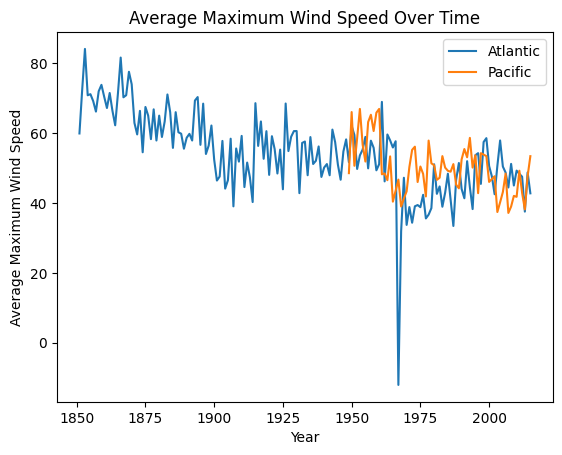

In [19]:
atlantic_mean_wind_by_year = atlantic.groupby('Year')['Maximum Wind'].mean()
pacific_mean_wind_by_year = pacific.groupby('Year')['Maximum Wind'].mean()

plt.plot(atlantic_mean_wind_by_year, label='Atlantic')
plt.plot(pacific_mean_wind_by_year, label='Pacific')
plt.title('Average Maximum Wind Speed Over Time')
plt.xlabel('Year')
plt.ylabel('Average Maximum Wind Speed')
plt.legend()
plt.show()


In [21]:
missing_rows = hurricanes.isna().any(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows}")

# Display the rows with missing values
rows_with_missing_values = hurricanes[hurricanes.isna().any(axis=1)]
print(rows_with_missing_values)

Number of rows with missing values: 0
Empty DataFrame
Columns: [ID, Name, Date, Time, Event, Status, Latitude, Longitude, Maximum Wind, Minimum Pressure, Low Wind NE, Low Wind SE, Low Wind SW, Low Wind NW, Moderate Wind NE, Moderate Wind SE, Moderate Wind SW, Moderate Wind NW, High Wind NE, High Wind SE, High Wind SW, High Wind NW, Year, Basin, Month, Day]
Index: []

[0 rows x 26 columns]


In [38]:
hurricanes['Status'] = hurricanes['Status'] == 'HU'

hurricanes_numeric = hurricanes.select_dtypes(include=['number'])
hurricanes_categorical = hurricanes.select_dtypes(include=['object'])



In [43]:
hurricanes.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Basin,Month,Day
0,AL011851,UNNAMED,1851-06-25,0,,False,28.0,-94.8,80,-999,...,-999,-999,-999,-999,-999,-999,1851,Atlantic,6,25
1,AL011851,UNNAMED,1851-06-25,600,,False,28.0,-95.4,80,-999,...,-999,-999,-999,-999,-999,-999,1851,Atlantic,6,25
2,AL011851,UNNAMED,1851-06-25,1200,,False,28.0,-96.0,80,-999,...,-999,-999,-999,-999,-999,-999,1851,Atlantic,6,25
3,AL011851,UNNAMED,1851-06-25,1800,,False,28.1,-96.5,80,-999,...,-999,-999,-999,-999,-999,-999,1851,Atlantic,6,25
4,AL011851,UNNAMED,1851-06-25,2100,L,False,28.2,-96.8,80,-999,...,-999,-999,-999,-999,-999,-999,1851,Atlantic,6,25


Encoding Categorical Variables

In [39]:
hurricanes_categorical.head()

,ID,Name,Event,Latitude,Longitude,Basin
0,AL011851,UNNAMED,,28.0,-94.8,Atlantic
1,AL011851,UNNAMED,,28.0,-95.4,Atlantic
2,AL011851,UNNAMED,,28.0,-96.0,Atlantic
3,AL011851,UNNAMED,,28.1,-96.5,Atlantic
4,AL011851,UNNAMED,L,28.2,-96.8,Atlantic


In [42]:
hurricanes_encoded = pd.get_dummies(hurricanes, columns=
                                    ['Name', 'Event', 'Status', 'Basin'],
                                     drop_first=True)
hurricanes_encoded.head()

,ID,Date,Time,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,...,Event_ C,Event_ G,Event_ I,Event_ L,Event_ P,Event_ R,Event_ S,Event_ T,Event_ W,Basin_Pacific
0,AL011851,1851-06-25,0,28.0,-94.8,80,-999,-999,-999,-999,...,False,False,False,False,False,False,False,False,False,False
1,AL011851,1851-06-25,600,28.0,-95.4,80,-999,-999,-999,-999,...,False,False,False,False,False,False,False,False,False,False
2,AL011851,1851-06-25,1200,28.0,-96.0,80,-999,-999,-999,-999,...,False,False,False,False,False,False,False,False,False,False
3,AL011851,1851-06-25,1800,28.1,-96.5,80,-999,-999,-999,-999,...,False,False,False,False,False,False,False,False,False,False
4,AL011851,1851-06-25,2100,28.2,-96.8,80,-999,-999,-999,-999,...,False,False,False,True,False,False,False,False,False,False


In [41]:
hurricanes_numeric.head()

,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year,Month,Day
0,0,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25
1,600,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25
2,1200,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25
3,1800,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25
4,2100,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,1851,6,25


Standardization

In [37]:
from sklearn.discriminant_analysis import StandardScaler


X = hurricanes_encoded.drop('Status', axis = 1)
y = hurricanes_encoded['Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

KeyError: "['Status'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)